In [1]:
#Import 311 Service Request for Graffiti
import pandas as pd
raw_graf = pd.read_csv("311-graf.csv")

/Users/campusmedialoaner/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (12,13,14,15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
#Convert Creates and Closed Dates
raw_graf["Created Date Test"] = pd.to_datetime(raw_graf["Created Date"])
# Due to reoccuring error to convert "Closed Date" to datetime, 
# I "coerce" error to just show Date and no time.
# The error is due to "12:00:00 AM", it was out of bound
raw_graf["Closed Date Test"] = pd.to_datetime(raw_graf["Closed Date"], errors='coerce')

In [3]:
#Frequency by Borough
raw_graf["Park Borough"].value_counts()

BROOKLYN         63798
MANHATTAN        31623
BRONX            31142
QUEENS           27744
STATEN ISLAND     2358
Unspecified         28
Name: Park Borough, dtype: int64

In [4]:
#Frequency by Resolution Descrip
raw_graf["Resolution Description"].value_counts()

The City has removed the graffiti from this property.                                                                                                                                                                                                               105014
The City inspected the property for cleaning, but no graffiti was found.                                                                                                                                                                                             16313
The graffiti on this property has been scheduled to be removed by the City.                                                                                                                                                                                          11396
The cleaning crew was dispatched, but the owner refused to have the graffiti removed.                                                                                                                  

# Resolution Time by hours

In [5]:
#drop all closed date null values
raw_graf_closed = raw_graf.dropna(subset=["Closed Date Test"])
# Compute time it takes to resolve issue by hours
raw_graf_closed["Time Delta"] = (raw_graf_closed["Closed Date Test"] - raw_graf_closed["Created Date Test"]).astype('timedelta64[h]')

/Users/campusmedialoaner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [6]:
# Order by "Created Date Test"
raw_graf_date = raw_graf_closed.set_index(raw_graf_closed["Created Date Test"])

In [7]:
#Group by Year
raw_graf_2018 = raw_graf_date.loc['2018-01-01':'2018-12-31']
raw_graf_2017 = raw_graf_date.loc['2017-01-01':'2017-12-31']
raw_graf_2016 = raw_graf_date.loc['2016-01-01':'2016-12-31']
raw_graf_2015 = raw_graf_date.loc['2015-01-01':'2015-12-31']
raw_graf_2014 = raw_graf_date.loc['2014-01-01':'2014-12-31']
raw_graf_2013 = raw_graf_date.loc['2013-01-01':'2013-12-31']
raw_graf_2012 = raw_graf_date.loc['2012-01-01':'2012-12-31']
raw_graf_2011 = raw_graf_date.loc['2011-01-01':'2011-12-31']
raw_graf_2010 = raw_graf_date.loc['2010-01-01':'2010-12-31']

## Test in 2018

In [8]:
# Group by Zip Incident
graf_z2018 = raw_graf_2018[["Incident Zip", "Time Delta"]]

In [9]:
graf_z2018_t = graf_z2018.groupby("Incident Zip").count()
graf_z2018_m = graf_z2018.groupby("Incident Zip").mean()

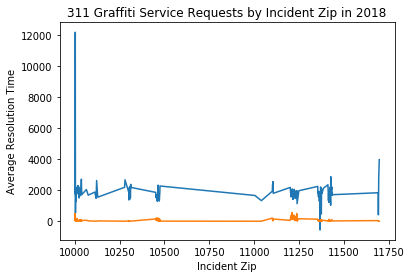

In [11]:
# Plot the average resolution time for 2018 by zip code
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
plt.plot(graf_z2018_m, label="Mean Time Delta")
plt.plot(graf_z2018_t, label='Frequency')
plt.xlabel("Incident Zip")
plt.ylabel("Average Resolution Time")
plt.title("311 Graffiti Service Requests by Incident Zip in 2018")
plt.show()

In [12]:
# Test by Police Precinct
graf_p2018 = raw_graf_2018[["Police Precincts", "Time Delta"]]

In [13]:
# Frequency
graf_p2018_t = graf_p2018.groupby("Police Precincts").count()
# Average
graf_p2018_m = graf_p2018.groupby("Police Precincts").mean()

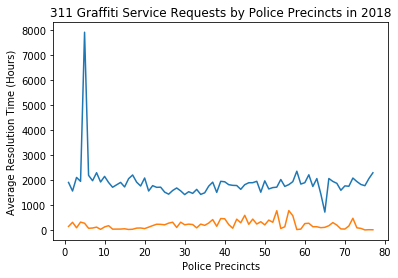

In [14]:
plt.plot(graf_p2018_m, label="Mean Time Delta")
plt.plot(graf_p2018_t, label="Frequency")
plt.xlabel("Police Precincts")
plt.ylabel("Average Resolution Time (Hours)")
plt.title("311 Graffiti Service Requests by Police Precincts in 2018")
plt.show()

In [15]:
# Group by Borough
graf_b2018 = raw_graf_2018[["Borough Boundaries", "Time Delta"]]

In [16]:
# Frequency
graf_b2018_t = graf_b2018.groupby("Borough Boundaries").count()
# Average
graf_b2018_m = graf_b2018.groupby("Borough Boundaries").mean()

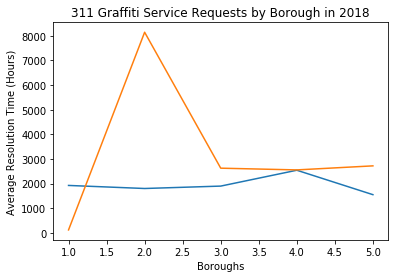

In [17]:
plt.plot(graf_b2018_m, label="Mean Time Delta") #Blue
plt.plot(graf_b2018_t, label="Frequency") #Orange
plt.xlabel("Boroughs")
plt.ylabel("Average Resolution Time (Hours)")
plt.title("311 Graffiti Service Requests by Borough in 2018")
plt.show()

In [18]:
graf_b2018_m["Total"] = graf_b2018_t["Time Delta"]
graf_b2018_m["Time Avg"] = graf_b2018_m["Time Delta"]

In [19]:
graf_b2018_m["Rate"] = graf_b2018_m["Time Avg"]/graf_b2018_m["Total"]
graf_b2018_rate = graf_b2018_m["Rate"]

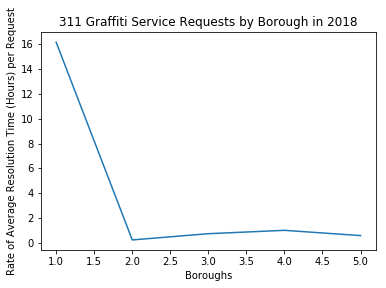

In [20]:
plt.plot(graf_b2018_rate)
plt.xlabel("Boroughs")
plt.ylabel("Rate of Average Resolution Time (Hours) per Request")
plt.title("311 Graffiti Service Requests by Borough in 2018")
plt.show()

## Test in 2017

In [22]:
# Test by Police Precinct
graf_p2017 = raw_graf_2017[["Police Precincts", "Time Delta"]]

In [23]:
# Frequency
graf_p2017_t = graf_p2017.groupby("Police Precincts").count()
# Average
graf_p2017_m = graf_p2017.groupby("Police Precincts").mean()

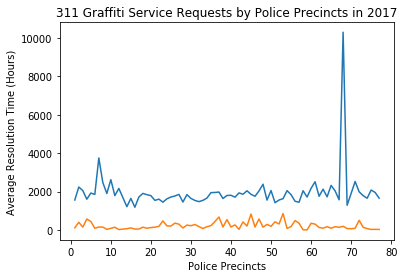

In [24]:
plt.plot(graf_p2017_m, label="Mean Time Delta")
plt.plot(graf_p2017_t, label="Frequency")
plt.xlabel("Police Precincts")
plt.ylabel("Average Resolution Time (Hours)")
plt.title("311 Graffiti Service Requests by Police Precincts in 2017")
plt.show()

In [25]:
# Group by Borough
graf_b2017 = raw_graf_2017[["Borough Boundaries", "Time Delta"]]

In [26]:
# Frequency
graf_b2017_t = graf_b2017.groupby("Borough Boundaries").count()
# Average
graf_b2017_m = graf_b2017.groupby("Borough Boundaries").mean()
graf_b2017_t

,Time Delta
Borough Boundaries,
1.0,155
2.0,7972
3.0,2511
4.0,3293
5.0,2822


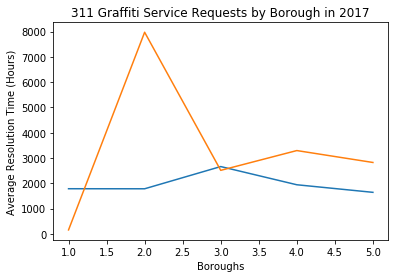

In [27]:
plt.plot(graf_b2017_m, label="Mean Time Delta") #Blue
plt.plot(graf_b2017_t, label="Frequency") #Orange
plt.xlabel("Boroughs")
plt.ylabel("Average Resolution Time (Hours)")
plt.title("311 Graffiti Service Requests by Borough in 2017")
plt.show()

In [28]:
graf_b2017_m["Total"] = graf_b2017_t["Time Delta"]
graf_b2017_m["Time Avg"] = graf_b2017_m["Time Delta"]
graf_b2017_m["Rate"] = graf_b2017_m["Time Avg"]/graf_b2017_m["Total"]
graf_b2017_rate = graf_b2017_m["Rate"]

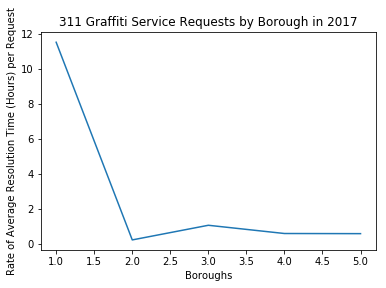

In [29]:
plt.plot(graf_b2017_rate)
plt.xlabel("Boroughs")
plt.ylabel("Rate of Average Resolution Time (Hours) per Request")
plt.title("311 Graffiti Service Requests by Borough in 2017")
plt.show()